In [2]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [3]:
dataset_path = 'completedataset'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [4]:
feature_sets_path = 'data'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'right.h5'
wake_word = 'right'

In [5]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))# Load feature sets
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [6]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
# Assigning feature sets

In [7]:
print(x_train.shape)  #Checking the dimensions
print(x_val.shape)
print(x_test.shape)
print(y_val)

(77541, 16, 16)
(9678, 16, 16)
(9637, 16, 16)
[12.  1.  1. ... 17.  6. 29.]


In [8]:
wake_word_index = all_targets.index(wake_word)    # Convert ground truth arrays to one wake word (1) and 'other' (0)

y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [9]:
with np.printoptions(threshold=np.inf):
    print(y_val)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [10]:

print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.03244471998346766
0.9675552800165323


In [11]:
print(x_train.shape)

(77541, 16, 16)


In [12]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77541, 16, 16, 1)
(9678, 16, 16, 1)
(9637, 16, 16, 1)


In [13]:
sample_shape = x_test.shape[1:]# Input shape for CNN is size of MFCC of 1 sample

print(sample_shape)

(16, 16, 1)


In [14]:
model = models.Sequential() #Model Training
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [17]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
776/776 [==============================] - 7s 9ms/step - loss: 0.1064 - acc: 0.9704 - val_loss: 0.0563 - val_acc: 0.9831
Epoch 2/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0640 - acc: 0.9803 - val_loss: 0.0448 - val_acc: 0.9863
Epoch 3/30
776/776 [==============================] - 8s 10ms/step - loss: 0.0540 - acc: 0.9838 - val_loss: 0.0788 - val_acc: 0.9812
Epoch 4/30
776/776 [==============================] - 8s 10ms/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0479 - val_acc: 0.9853
Epoch 5/30
776/776 [==============================] - 8s 10ms/step - loss: 0.0425 - acc: 0.9875 - val_loss: 0.0522 - val_acc: 0.9841
Epoch 6/30
776/776 [==============================] - 8s 10ms/step - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0352 - val_acc: 0.9897
Epoch 7/30
776/776 [==============================] - 8s 10ms/step - loss: 0.0381 - acc: 0.9887 - val_loss: 0.0348 - val_acc: 0.9893
Epoch 8/30
776/776 [==============================] - 8s 11ms/step - lo

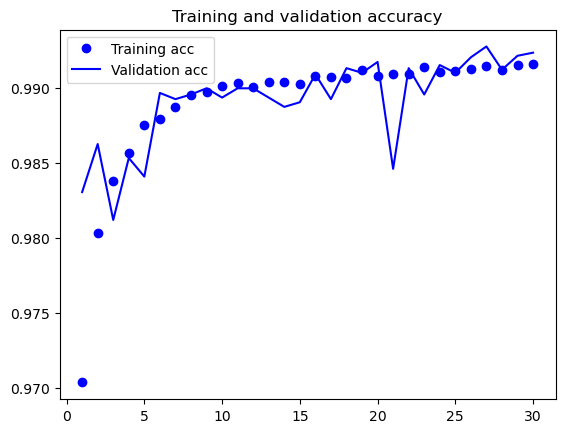

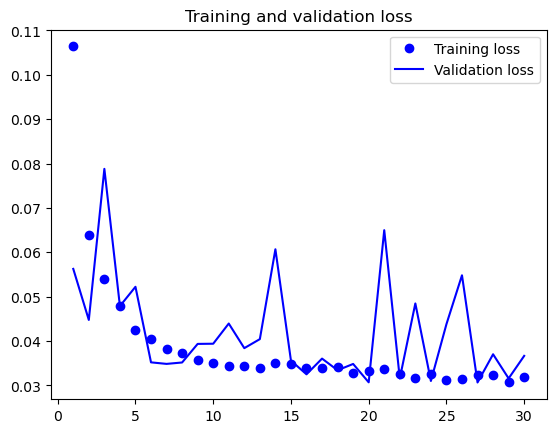

In [18]:
#Results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
models.save_model(model, model_filename)

In [20]:
for idx, y in enumerate(y_test):   # See which are 'left'
    if y == 1:
        print(idx)

20
50
79
111
114
166
212
270
299
400
485
500
536
543
640
643
665
710
718
745
750
766
801
831
837
852
858
862
882
902
1008
1013
1016
1025
1065
1128
1130
1194
1200
1254
1277
1330
1358
1386
1468
1474
1480
1498
1499
1517
1535
1537
1586
1637
1701
1709
1779
1805
1844
1901
1905
1941
1985
1989
2019
2078
2095
2102
2117
2132
2134
2141
2153
2169
2186
2212
2255
2378
2389
2432
2443
2459
2462
2467
2482
2530
2544
2557
2582
2615
2706
2738
2761
2824
2829
2842
2869
2887
2902
2921
2971
2985
3002
3074
3211
3223
3260
3277
3321
3328
3335
3341
3447
3469
3519
3535
3582
3601
3682
3717
3758
3845
3847
3902
3932
3943
4006
4016
4114
4116
4203
4212
4236
4241
4269
4321
4377
4387
4423
4426
4483
4510
4545
4563
4598
4616
4621
4667
4674
4676
4678
4704
4717
4805
4831
4841
4844
4847
4854
4883
4963
4991
4993
5001
5022
5034
5055
5093
5132
5133
5135
5147
5218
5241
5243
5256
5271
5290
5291
5315
5342
5366
5397
5416
5417
5451
5483
5492
5553
5604
5685
5708
5722
5743
5750
5764
5809
5828
5848
5858
5902
5945
5948
5957
5966
5983
598

In [21]:
model = models.load_model(model_filename)
#Load model and run it against test set
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

1/1 [==============================] - 0s 140ms/step
Answer: 0.0  Prediction: [[6.5990653e-16]]
1/1 [==============================] - 0s 22ms/step
Answer: 0.0  Prediction: [[2.2822852e-28]]
1/1 [==============================] - 0s 20ms/step
Answer: 0.0  Prediction: [[0.01195709]]
1/1 [==============================] - 0s 31ms/step
Answer: 0.0  Prediction: [[1.957158e-06]]
1/1 [==============================] - 0s 29ms/step
Answer: 0.0  Prediction: [[6.986475e-10]]
1/1 [==============================] - 0s 23ms/step
Answer: 0.0  Prediction: [[6.9399866e-26]]
1/1 [==============================] - 0s 24ms/step
Answer: 0.0  Prediction: [[1.2025182e-11]]
1/1 [==============================] - 0s 38ms/step
Answer: 0.0  Prediction: [[1.1220038e-07]]
1/1 [==============================] - 0s 34ms/step
Answer: 0.0  Prediction: [[0.00809244]]
1/1 [==============================] - 0s 28ms/step
Answer: 0.0  Prediction: [[2.1070925e-09]]


In [22]:
model.evaluate(x=x_test, y=y_test)

302/302 [==============================] - 1s 2ms/step - loss: 0.0385 - acc: 0.9901


[0.03851909190416336, 0.9901421666145325]